In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
resolution = 1000
flank=50000
mindist=5000

In [3]:
# clr_1 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/DMSO4h/DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/dTAG4h/DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

# clr_0 = cooler.Cooler(f'../DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
# clr_1 = cooler.Cooler(f'../DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'../DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'../DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'../DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'../DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'../DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

clr_0 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
# clr_0 = cooler.Cooler(f'/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/fig2/2D/R3/C-C/C-C_50bp.mcool::/resolutions/{resolution}')
clr_1 = cooler.Cooler(f'DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_2 = cooler.Cooler(f'DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_5 = cooler.Cooler(f'DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_6 = cooler.Cooler(f'DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
# sites = bioframe.read_table('DNaseC_293T_loop_groupby_0.1_10kb.txt', schema='bedpe')

sites = bioframe.read_table('DNaseC_293T_loop_groupby_50_5000kb.txt', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

sites = sites[sites['score'] > 2]

In [6]:
sites

,chrom1,start1,end1,chrom2,start2,end2,name,score,strand1,strand2
0,chr17,73370067,73370068,chr17,73429561,73429562,2,3,-,+
10,chr17,73429561,73429562,chr17,73657679,73657680,14,4,+,+
11,chr17,73429561,73429562,chr17,73698009,73698010,15,3,+,-
12,chr17,73429561,73429562,chr17,73710346,73710347,16,8,+,-
15,chr17,73429561,73429562,chr17,73783231,73783232,19,4,+,-
...,...,...,...,...,...,...,...,...,...,...
179507,chr17,72725659,72725660,chr17,73189750,73189751,291378,7,+,-
179508,chr17,72725659,72725660,chr17,73191646,73191647,291379,4,+,+
179511,chr17,72725659,72725660,chr17,73255861,73255862,291382,4,+,+
179554,chr17,73191646,73191647,chr17,73370067,73370068,291444,3,+,-


In [7]:
# expected_0 = expected_cis(
#     clr_0,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [8]:
# pup_0 = coolpup.pileup(
#     clr_0, 
#     sites, 
#     features_format='bedpe', 
#     view_df=hg38_arms, 
# #     local=True,
# #     flip_negative_strand=True, 
#     expected_df=expected_0,
# #     nshifts=10,
#     flank=flank, 
#     mindist=mindist, 
# #     maxdist=600_000,
# #     subset=2000, 
# #     seed=1,
#     min_diag=2, 
#     nproc=80
# )

In [9]:
# fig_0 = plotpup.plot(
#     pup_0,
#     score=True, 
#     cmap='coolwarm', 
#     scale='log',
#     sym=True, 
#     vmax=7.5,
#     vmin=0.13,
#     height=2, 
#     plot_ticks=True
# )

# # fig_0.savefig('293T_WT.pdf')

In [10]:
# expected_1 = expected_cis(
#     clr_1,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [11]:
pup_1 = coolpup.pileup(
    clr_1, 
    sites, 
    features_format='bedpe', 
    view_df=hg38_arms, 
#     local=True,
#     flip_negative_strand=True, 
#     expected_df=expected_1,
    nshifts=10,
    flank=flank, 
    mindist=mindist, 
#     maxdist=600_000,
#     subset=2000, 
#     seed=1,
    min_diag=2, 
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 84
INFO:coolpuppy:('chr16_p', 'chr16_p'): 221
INFO:coolpuppy:('chr19_p', 'chr19_p'): 380
INFO:coolpuppy:('chr20_p', 'chr20_p'): 246
INFO:coolpuppy:('chr16_q', 'chr16_q'): 409
INFO:coolpuppy:('chr17_p', 'chr17_p'): 274
INFO:coolpuppy:('chrX_p', 'chrX_p'): 367
INFO:coolpuppy:('chr21_q', 'chr21_q'): 311
INFO:coolpuppy:('chr20_q', 'chr20_q'): 487
INFO:coolpuppy:('chr19_q', 'chr19_q'): 467
INFO:coolpuppy:('chr8_p', 'chr8_p'): 390
INFO:coolpuppy:('chr5_p', 'chr5_p'): 264
INFO:coolpuppy:('chr4_p', 'chr4_p'): 278
INFO:coolpuppy:('chr12_p', 'chr12_p'): 473
INFO:coolpuppy:('chr10_p', 'chr10_p'): 345
INFO:coolpuppy:('chr9_p', 'chr9_p'): 422
INFO:coolpuppy:('chr22_q', 'chr22_q'): 448
INFO:coolpuppy:('chr7_p', 'chr7_p'): 676
INFO:coolpuppy:('chr11_p', 'chr11_p'): 616
INFO:coolpuppy:('chr18_q', 'chr18_q'): 518
INFO:coolpuppy:('chrX_q', 'chrX_q'): 603
INFO:coolpuppy:('chr17_q', 'chr17_q'): 866
INFO:coolpuppy:('chr9_q', 'chr9_q'): 811
INFO:coolpuppy:('chr7_q', 'c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


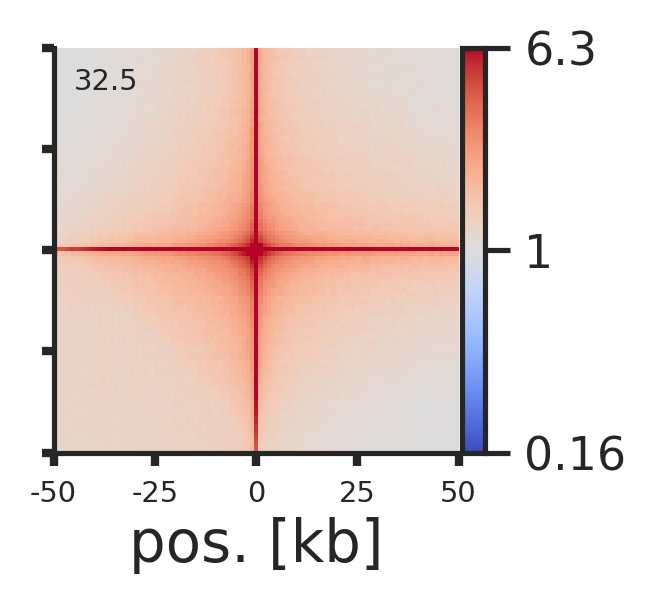

In [12]:
fig_1 = plotpup.plot(
    pup_1,
    score=True, 
    cmap='coolwarm', 
    scale='log',
    sym=True, 
    vmax=6.3,
    vmin=0.159,
    height=2, 
    plot_ticks=True
)

# fig_1.savefig('R3D7_DMSO.pdf')

In [13]:
# expected_2 = expected_cis(
#     clr_2,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [14]:
pup_2 = coolpup.pileup(
    clr_2,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
#     expected_df=expected_2,                      
    nshifts=10,                      
    flank=flank,                      
    mindist=mindist,
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                     
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 84
INFO:coolpuppy:('chr16_p', 'chr16_p'): 221
INFO:coolpuppy:('chr17_p', 'chr17_p'): 274
INFO:coolpuppy:('chr10_p', 'chr10_p'): 345
INFO:coolpuppy:('chr5_p', 'chr5_p'): 264
INFO:coolpuppy:('chr20_p', 'chr20_p'): 246
INFO:coolpuppy:('chr4_p', 'chr4_p'): 278
INFO:coolpuppy:('chr8_p', 'chr8_p'): 390
INFO:coolpuppy:('chr12_p', 'chr12_p'): 473
INFO:coolpuppy:('chrX_p', 'chrX_p'): 367
INFO:coolpuppy:('chr19_q', 'chr19_q'): 467
INFO:coolpuppy:('chr19_p', 'chr19_p'): 380
INFO:coolpuppy:('chr21_q', 'chr21_q'): 311
INFO:coolpuppy:('chr9_p', 'chr9_p'): 422
INFO:coolpuppy:('chr22_q', 'chr22_q'): 448
INFO:coolpuppy:('chr16_q', 'chr16_q'): 409
INFO:coolpuppy:('chr11_p', 'chr11_p'): 616
INFO:coolpuppy:('chr20_q', 'chr20_q'): 487
INFO:coolpuppy:('chr18_q', 'chr18_q'): 518
INFO:coolpuppy:('chr6_p', 'chr6_p'): 830
INFO:coolpuppy:('chrX_q', 'chrX_q'): 603
INFO:coolpuppy:('chr9_q', 'chr9_q'): 811
INFO:coolpuppy:('chr7_p', 'chr7_p'): 676
INFO:coolpuppy:('chr17_q', 'ch

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


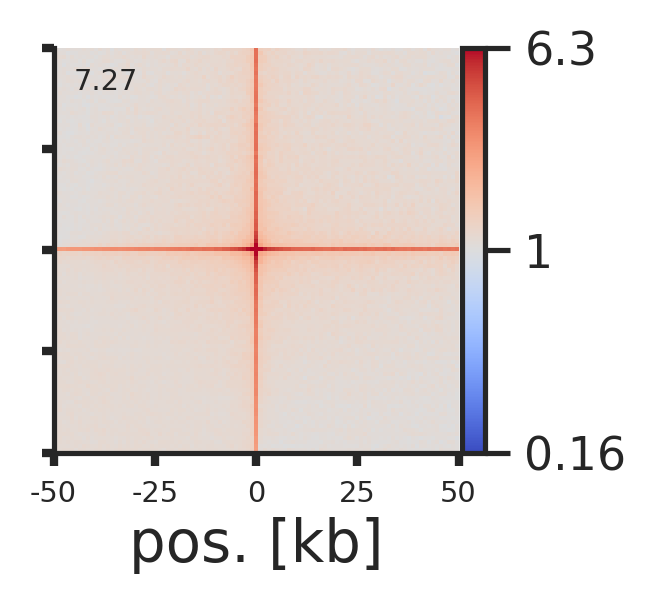

In [15]:
fig_2 = plotpup.plot(
    pup_2,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,
    vmax=6.3,
    vmin=0.159,         
    height=2,             
    plot_ticks=True
)

# fig_2.savefig('R3D7_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


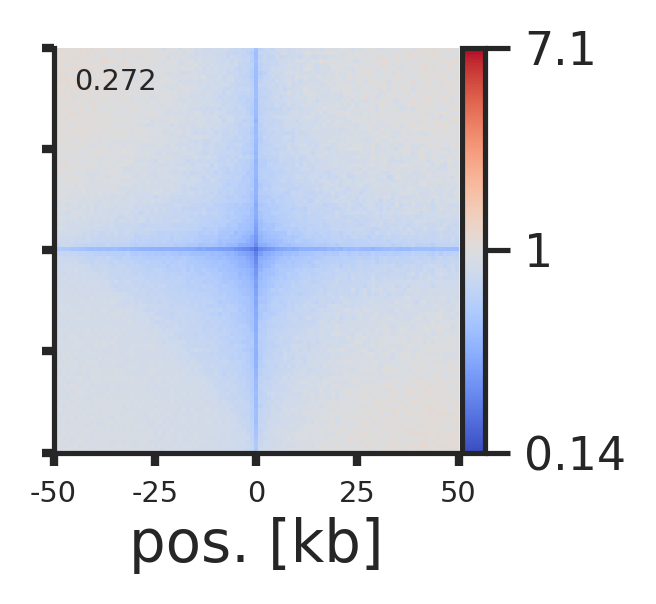

In [16]:
pup_divide_1 = divide_pups(pup_2, pup_1)

fig_divide_1 = plotpup.plot(
    pup_divide_1,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=7.1,
    vmin=0.14,
    height=2,
    plot_ticks=True
)

fig_divide_1.savefig('R3D7_dTAG-DMSO_50_5000kb.pdf')

In [17]:
# expected_3= expected_cis(
#     clr_3,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [18]:
# pup_3 = coolpup.pileup(
#     clr_3,                       
#     sites,                       
#     features_format='bedpe',                       
#     view_df=hg38_arms,                      
# #     local=True,                      
# #     flip_negative_strand=True,                      
#     expected_df=expected_3,                      
# #     nshifts=10,                      
#     flank=flank,                      
#     mindist=mindist, 
# #     maxdist=600_000,
# #     subset=2000, 
# #     seed=1,                      
#     min_diag=2,                      
#     nproc=80
# )

In [19]:
# fig_3 = plotpup.plot(
#     pup_3,            
#     score=True,             
#     cmap='coolwarm',             
#     scale='log',             
#     sym=True, 
#     vmax=6.3,
#     vmin=0.159,          
#     height=2,             
#     plot_ticks=True
# )

# # fig_3.savefig('C2D5_DMSO.pdf')

In [20]:
# expected_4 = expected_cis(
#     clr_4,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [21]:
# pup_4 = coolpup.pileup(
#     clr_4,                       
#     sites,                       
#     features_format='bedpe',                       
#     view_df=hg38_arms,                      
# #     local=True,                      
# #     flip_negative_strand=True,                      
#     expected_df=expected_4,                      
# #     nshifts=10,                      
#     flank=flank,                      
#     mindist=mindist,                      
# #     maxdist=600_000,                     
# #     subset=2000,                     
# #     seed=1,                      
#     min_diag=2,                      
#     nproc=80
# )

In [22]:
# fig_4 = plotpup.plot(
#     pup_4,             
#     score=True,             
#     cmap='coolwarm',             
#     scale='log',             
#     sym=True, 
#     vmax=6.3,
#     vmin=0.159,          
#     height=2,             
#     plot_ticks=True
# )

# # fig_4.savefig('C2D5_dTAG.pdf')

In [23]:
# pup_divide_2 = divide_pups(pup_4, pup_3)

# fig_divide_2 = plotpup.plot(
#     pup_divide_2,             
#     score=True,             
#     cmap='coolwarm',             
#     scale='log',             
#     sym=True,             
#     vmax=3.3,             
#     vmin=0.3,        
#     height=2,             
#     plot_ticks=True            
# )

# # fig_divide_2.savefig('C2D5_dTAG-DMSO.pdf')

In [24]:
# expected_5 = expected_cis(
#     clr_5,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [25]:
pup_5 = coolpup.pileup(
    clr_5,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
#     expected_df=expected_5,                      
    nshifts=10,                      
    flank=flank,                      
    mindist=mindist,                       
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                     
    min_diag=2,                      
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 84
INFO:coolpuppy:('chr17_p', 'chr17_p'): 274
INFO:coolpuppy:('chr16_p', 'chr16_p'): 221
INFO:coolpuppy:('chr10_p', 'chr10_p'): 345
INFO:coolpuppy:('chr8_p', 'chr8_p'): 390
INFO:coolpuppy:('chr20_p', 'chr20_p'): 246
INFO:coolpuppy:('chr19_p', 'chr19_p'): 380
INFO:coolpuppy:('chr4_p', 'chr4_p'): 278
INFO:coolpuppy:('chr5_p', 'chr5_p'): 264
INFO:coolpuppy:('chrX_p', 'chrX_p'): 367
INFO:coolpuppy:('chr19_q', 'chr19_q'): 467
INFO:coolpuppy:('chr21_q', 'chr21_q'): 311
INFO:coolpuppy:('chr12_p', 'chr12_p'): 473
INFO:coolpuppy:('chr11_p', 'chr11_p'): 616
INFO:coolpuppy:('chr16_q', 'chr16_q'): 409
INFO:coolpuppy:('chr20_q', 'chr20_q'): 487
INFO:coolpuppy:('chr22_q', 'chr22_q'): 448
INFO:coolpuppy:('chr9_p', 'chr9_p'): 422
INFO:coolpuppy:('chr18_q', 'chr18_q'): 518
INFO:coolpuppy:('chr13_q', 'chr13_q'): 689
INFO:coolpuppy:('chr17_q', 'chr17_q'): 866
INFO:coolpuppy:('chr7_p', 'chr7_p'): 676
INFO:coolpuppy:('chrX_q', 'chrX_q'): 603
INFO:coolpuppy:('chr6_p', 

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


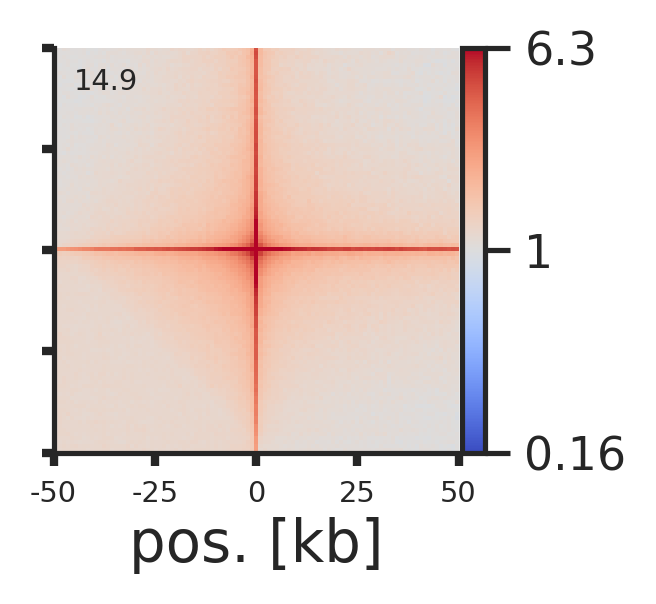

In [26]:
fig_5 = plotpup.plot(
    pup_5,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=6.3,
    vmin=0.159,           
    height=2,             
    plot_ticks=True
)

# fig_5.savefig('RC1A3_DMSO.pdf')

In [27]:
# expected_6 = expected_cis(
#     clr_6,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [28]:
pup_6 = coolpup.pileup(
    clr_6,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
#     expected_df=expected_6,                      
    nshifts=10,                      
    flank=flank,                      
    mindist=mindist,                      
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                      
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 84
INFO:coolpuppy:('chr16_p', 'chr16_p'): 221
INFO:coolpuppy:('chr17_p', 'chr17_p'): 274
INFO:coolpuppy:('chr19_p', 'chr19_p'): 380
INFO:coolpuppy:('chr16_q', 'chr16_q'): 409
INFO:coolpuppy:('chr20_p', 'chr20_p'): 246
INFO:coolpuppy:('chr5_p', 'chr5_p'): 264
INFO:coolpuppy:('chr10_p', 'chr10_p'): 345
INFO:coolpuppy:('chr12_p', 'chr12_p'): 473
INFO:coolpuppy:('chr4_p', 'chr4_p'): 278
INFO:coolpuppy:('chr11_p', 'chr11_p'): 616
INFO:coolpuppy:('chr21_q', 'chr21_q'): 311
INFO:coolpuppy:('chr8_p', 'chr8_p'): 390
INFO:coolpuppy:('chr20_q', 'chr20_q'): 487
INFO:coolpuppy:('chr19_q', 'chr19_q'): 467
INFO:coolpuppy:('chr22_q', 'chr22_q'): 448
INFO:coolpuppy:('chr9_p', 'chr9_p'): 422
INFO:coolpuppy:('chrX_p', 'chrX_p'): 367
INFO:coolpuppy:('chrX_q', 'chrX_q'): 603
INFO:coolpuppy:('chr18_q', 'chr18_q'): 518
INFO:coolpuppy:('chr9_q', 'chr9_q'): 811
INFO:coolpuppy:('chr7_p', 'chr7_p'): 676
INFO:coolpuppy:('chr6_p', 'chr6_p'): 830
INFO:coolpuppy:('chr17_q', 'ch

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


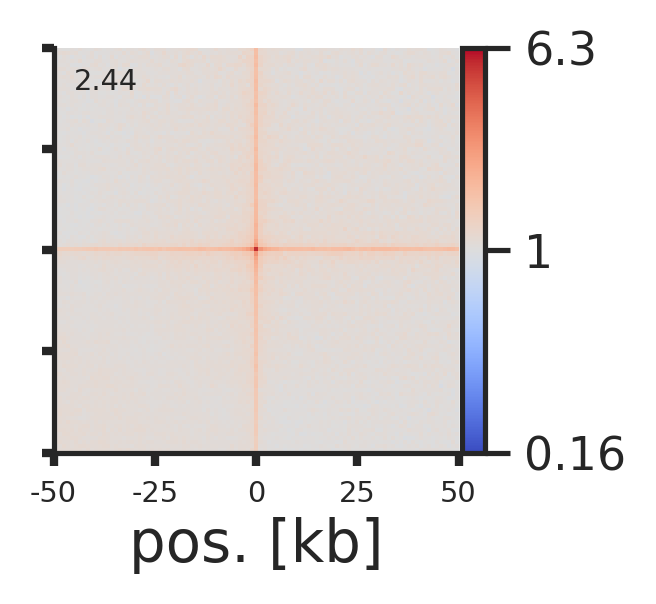

In [29]:
fig_6 = plotpup.plot(
    pup_6,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,              
    vmax=6.3,
    vmin=0.159,            
    height=2,             
    plot_ticks=True
)

# fig_6.savefig('RC1A3_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


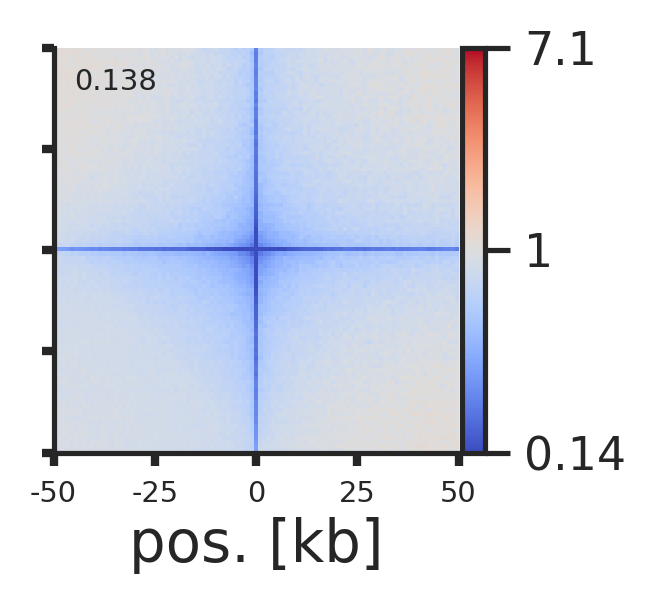

In [30]:
pup_divide_3 = divide_pups(pup_6, pup_1)

fig_divide_3 = plotpup.plot(
    pup_divide_3,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=7.1,
    vmin=0.14,            
    height=2,             
    plot_ticks=True            
)

fig_divide_3.savefig('RC1A3_dTAG-DMSO_50_5000kb.pdf')